### Specifying neccessary imports 

In [8]:
import pandas as pd
import numpy as np
import dask.dataframe as dask_data

import matplotlib
import matplotlib.pyplot as plt
import seaborn
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot, plot, download_plotlyjs

import sklearn
import matplotlib.dates as mdates



In [10]:
matplotlib.style.use('ggplot')

parse_date = lambda val : pd.datetime.strptime(val, '%y%m%d%H')

### Sampling the training data

In [11]:
import random
n = 40428966  #total number of records in the clickstream data 
sample_size = 1000000
skip_values = sorted(random.sample(range(1,n), n-sample_size)) 

### Data Loading stage 

In [13]:
train_data = pd.read_csv('./all/train/train.csv', parse_dates = ['hour'], date_parser = parse_date,
                        skiprows = skip_values )



In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000001 entries, 0 to 1000000
Data columns (total 24 columns):
id                  1000001 non-null uint64
click               1000001 non-null int64
hour                1000001 non-null datetime64[ns]
C1                  1000001 non-null int64
banner_pos          1000001 non-null int64
site_id             1000001 non-null object
site_domain         1000001 non-null object
site_category       1000001 non-null object
app_id              1000001 non-null object
app_domain          1000001 non-null object
app_category        1000001 non-null object
device_id           1000001 non-null object
device_ip           1000001 non-null object
device_model        1000001 non-null object
device_type         1000001 non-null int64
device_conn_type    1000001 non-null int64
C14                 1000001 non-null int64
C15                 1000001 non-null int64
C16                 1000001 non-null int64
C17                 1000001 non-null int64
C18     

## Memory Optimization

In [307]:
data_types = {
    'id': np.str,
    'click': np.bool_,
    'hour': np.str,
    'C1': np.uint16,
    'banner_pos': np.uint16,
    'site_id': np.object,
    'site_domain': np.object,
    'site_category': np.object,
    'app_id': np.object,
    'app_domain': np.object,
    'app_category': np.object,
    'device_id': np.object,
    'device_ip': np.object,
    'device_model': np.object,
    'device_type': np.uint16,
    'device_conn_type': np.uint16,
    'C14': np.uint16,
    'C15': np.uint16,
    'C16': np.uint16,
    'C17': np.uint16,
    'C18': np.uint16,
    'C19': np.uint16,
    'C20': np.uint16,
    'C21': np.uint16
}

train_data = pd.read_csv('./all/train/train.csv', parse_dates = ['hour'],
                        date_parser = parse_date, skiprows = skip_values , 
                        dtype = data_types )




## A separate data frame where clicks = 1

In [78]:
train_data_clicks = train_data[train_data['click']==1]

In [17]:
train_data.info() 


## Memory consumption reduced to 107.8 + MB

'''
% reduction in memory usage = 40% 
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000001 entries, 0 to 1000000
Data columns (total 24 columns):
id                  1000001 non-null object
click               1000001 non-null bool
hour                1000001 non-null datetime64[ns]
C1                  1000001 non-null uint16
banner_pos          1000001 non-null uint16
site_id             1000001 non-null object
site_domain         1000001 non-null object
site_category       1000001 non-null object
app_id              1000001 non-null object
app_domain          1000001 non-null object
app_category        1000001 non-null object
device_id           1000001 non-null object
device_ip           1000001 non-null object
device_model        1000001 non-null object
device_type         1000001 non-null uint16
device_conn_type    1000001 non-null uint16
C14                 1000001 non-null uint16
C15                 1000001 non-null uint16
C16                 1000001 non-null uint16
C17                 1000001 non-null uint16
C

# Part 1: Exploratory Data Analytics

In [18]:
train_data.describe() 

,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
count,1.000001e+06,1.000001e+06,1.000001e+06,1.000001e+06,1.000001e+06,1.000001e+06,1.000001e+06,1.000001e+06,1.000001e+06,1.000001e+06,1.000001e+06,1.000001e+06
mean,1.004967e+03,2.879897e-01,1.015556e+00,3.314447e-01,1.884572e+04,3.189284e+02,6.009973e+01,2.113007e+03,1.431753e+00,2.266722e+02,4.905859e+04,8.345165e+01
std,1.095126e+00,5.071704e-01,5.291616e-01,8.550856e-01,4.950229e+03,2.146769e+01,4.729728e+01,6.086730e+02,1.326261e+00,3.506842e+02,1.544716e+04,7.032581e+01
min,1.001000e+03,0.000000e+00,0.000000e+00,0.000000e+00,3.750000e+02,1.200000e+02,2.000000e+01,1.120000e+02,0.000000e+00,3.300000e+01,3.446400e+04,1.000000e+00
25%,1.005000e+03,0.000000e+00,1.000000e+00,0.000000e+00,1.692000e+04,3.200000e+02,5.000000e+01,1.863000e+03,0.000000e+00,3.500000e+01,3.454800e+04,2.300000e+01
50%,1.005000e+03,0.000000e+00,1.000000e+00,0.000000e+00,2.034600e+04,3.200000e+02,5.000000e+01,2.323000e+03,2.000000e+00,3.900000e+01,3.465700e+04,6.100000e+01
75%,1.005000e+03,1.000000e+00,1.000000e+00,0.000000e+00,2.189400e+04,3.200000e+02,5.000000e+01,2.526000e+03,3.000000e+00,1.710000e+02,6.553500e+04,1.010000e+02
max,1.012000e+03,7.000000e+00,5.000000e+00,5.000000e+00,2.405200e+04,1.024000e+03,1.024000e+03,2.758000e+03,3.000000e+00,1.839000e+03,6.553500e+04,2.550000e+02


In [20]:
train_data.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,10010966574628106108,True,2014-10-21,1005,0,85f751fd,c4e18dd6,50e219e0,0acbeaa3,45a51db4,...,1,0,20596,320,50,2161,0,35,34498,157
1,10018563981679953217,False,2014-10-21,1005,0,85f751fd,c4e18dd6,50e219e0,8bfb92e0,7801e8d9,...,1,0,17661,320,50,1996,1,41,34521,71
2,10030228488972929850,False,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15705,320,50,1722,0,35,34548,79
3,10031998322520623865,False,2014-10-21,1005,0,6c5b482c,7687a86e,3e814130,ecad2386,7801e8d9,...,1,0,17654,300,250,1994,2,39,34547,33
4,10032235721168274495,False,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15708,320,50,1722,0,35,34548,79


In [23]:
train_data.iloc[:, :24].head(5)

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,10010966574628106108,True,2014-10-21,1005,0,85f751fd,c4e18dd6,50e219e0,0acbeaa3,45a51db4,...,1,0,20596,320,50,2161,0,35,34498,157
1,10018563981679953217,False,2014-10-21,1005,0,85f751fd,c4e18dd6,50e219e0,8bfb92e0,7801e8d9,...,1,0,17661,320,50,1996,1,41,34521,71
2,10030228488972929850,False,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15705,320,50,1722,0,35,34548,79
3,10031998322520623865,False,2014-10-21,1005,0,6c5b482c,7687a86e,3e814130,ecad2386,7801e8d9,...,1,0,17654,300,250,1994,2,39,34547,33
4,10032235721168274495,False,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15708,320,50,1722,0,35,34548,79


### CTR analysis ~ Click v/s No click distribution

False    0.830052
True     0.169948
Name: click, dtype: float64

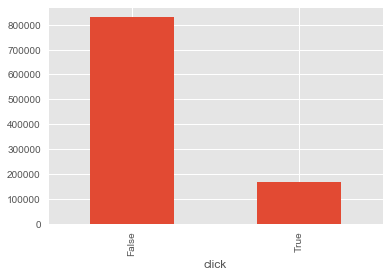

In [32]:
%matplotlib inline

train_data.groupby('click').size().plot(kind = 'bar')
rows = train_data.shape[0]

click_through_rate = train_data['click'].value_counts()/rows 

click_through_rate

'''
'''

### Click through rate on a set of 1 million records of click stream data sampled at random from the population of 40 million records is 16.9 ~ 17%. CTR effectively = 17% 


## Feature Engineering 

### Studying the relationships between different features and the target variable i.e 'Click'. Manipulating data in the process, introducing new metrics

### HOUR 

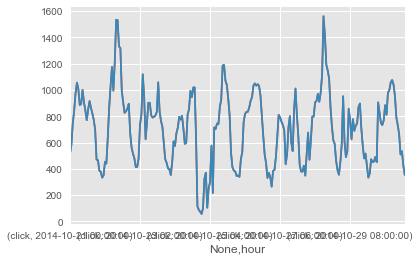

In [308]:
'''
Metric 1. HOUR 
'''

train_data.hour.describe() 


'''INSIGHT 2: Impressions V/S Clicks 
    MAXIMUM number of Impresisons around 1 P.M ~ 1561 '''

df_impressions = train_data.groupby('hour').agg({'click':'sum'})
#df_impressions
df_impressions.unstack().plot()

df_click = train_data[train_data['click']==1]
temp_click = df_click.groupby('hour').agg({'click' : 'sum'})
temp_click.unstack().plot()

#temp_click

In [309]:
train_data.hour.describe()

count                 1000001
unique                    240
top       2014-10-22 09:00:00
freq                    10909
first     2014-10-21 00:00:00
last      2014-10-30 23:00:00
Name: hour, dtype: object

In [ ]:
#Since Time Features are thought of in terms of cycles

# Creating Metrics From The Hour Field 

In [115]:
''' HOUR as a metric is difficult to read because it is a time stamp 
    Introducing new metrics: 
     1. hour_in_day - Better KPI to assess the impressions v/s clicks behavior w.r.t hour in day
     2. weekday -- To study user behavior w.r.t clicks on each day 
     3. Day_name -- To extract the day name from the HOUR feature for a better understanding 
'''

train_data['hour_in_day'] = train_data['hour'].apply(lambda val : val.hour)
#train_data_clicks['hour_in_day'] = train_data_clicks['hour'].apply(lambda val : val.hour)

train_data['weekday'] = train_data['hour'].apply(lambda val: val.dayofweek)
#train_data_clicks['weekday'] = train_data_clicks['hour'].apply(lambda val: val.dayofweek)

train_data['day_name'] = train_data['hour'].apply(lambda x: x.strftime('%A'))
#train_data_clicks['day_name'] = train_data_clicks['hour'].apply(lambda x: x.strftime('%A'))



In [71]:
train_data.columns

Index(['id', 'click', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'hour_in_day',
       'weekday', 'day_name'],
      dtype='object')

### Hour In day, weekday and day_name columns added

##### Monday = 0, Sunday = 6

# HOUR IN DAY

'\ntrain_data[\'weekday\'].nunique()\ntrain_data.groupby([\'weekday\', \'click\']).size().unstack().plot(kind=\'bar\', stacked=True, title="Days of the week")\n'

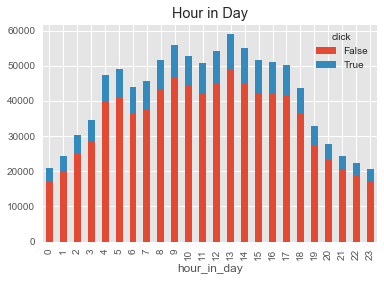

In [73]:
   
#train_data['hour_in_day'].nunique() ~ 0 TO 23 
train_data.groupby(['hour_in_day', 'click']).size().unstack().plot(kind='bar', stacked=True, title="Hour in Day")


In [76]:
train_data[['hour','click']].groupby(['hour']).sum().sort_values('click',ascending=False)

,click
hour,
2014-10-28 13:00:00,1561
2014-10-22 09:00:00,1534
2014-10-22 10:00:00,1532
2014-10-28 14:00:00,1416
2014-10-22 11:00:00,1331
2014-10-22 12:00:00,1319
2014-10-22 08:00:00,1212
2014-10-28 15:00:00,1193
2014-10-25 14:00:00,1191


In [82]:
train_data_clicks[['hour','click']].groupby(['hour']).sum().sort_values('click',ascending=False)

,click
hour,
2014-10-28 13:00:00,1561
2014-10-22 09:00:00,1534
2014-10-22 10:00:00,1532
2014-10-28 14:00:00,1416
2014-10-22 11:00:00,1331
2014-10-22 12:00:00,1319
2014-10-22 08:00:00,1212
2014-10-28 15:00:00,1193
2014-10-25 14:00:00,1191


## Hour in day - CTR v/s impressions analysis 

In [108]:
hour_df = pd.DataFrame() 

#creating a new independendt data frame 

In [110]:
hour_df['hr'] = train_data_clicks[['hour_in_day','click']].groupby(['hour_in_day']).count().reset_index().sort_values('click',ascending=False)['hour_in_day']
                        
hour_df
#hour_dataframe.drop("hr", axis = 1, inplace = True)

#train_data_clicks.head()

,hr
13,13
14,14
15,15
12,12
16,16
9,9
11,11
17,17
8,8
10,10


### Hour in day - Clicks

In [112]:
'''
Taking into account just the CLICKS 
'''
hour_df['pos_clicks'] = train_data_clicks[['hour_in_day','click']].groupby(['hour_in_day']).count().reset_index()
.sort_values('click',ascending=False)['click']
            
hour_df

,hr,pos_clicks
13,13,9893
14,14,9845
15,15,9459
12,12,9232
16,16,9170
9,9,8978
11,11,8626
17,17,8617
8,8,8573
10,10,8456


### Hour in day - Impressions

In [117]:
'''
Taking into account the IMPRESSIONS
'''
hour_df['impressions_total'] = train_data[['hour_in_day','click']].groupby(['hour_in_day']).count().reset_index().sort_values('click',ascending=False)['click']
            
hour_df


,hr,pos_clicks,impressions_total
13,13,9893,58886
14,14,9845,54974
15,15,9459,51764
12,12,9232,54308
16,16,9170,50996
9,9,8978,55822
11,11,8626,50843
17,17,8617,50342
8,8,8573,51738
10,10,8456,52845


### Introducing Click through rate

In [129]:
'''
Introducing a new feature click through rate 
'''

hour_df['click_through_rate'] = 100*hour_df['pos_clicks']/hour_df['impressions_total']

#hour_df.sort_values(ascending = False, by = 'impressions_total')
hour_df.sort_values(ascending = False, by = 'click_through_rate')


,hr,pos_clicks,impressions_total,click_through_rate
1,1,4473,24385,18.343244
15,15,9459,51764,18.273317
16,16,9170,50996,17.981802
7,7,8215,45708,17.972784
14,14,9845,54974,17.908466
0,0,3723,20938,17.781068
23,23,3570,20498,17.416333
2,2,5246,30218,17.360514
3,3,5996,34617,17.320969
6,6,7521,43924,17.122757


In [130]:
list_of_hours = hour_df.sort_values(by='click_through_rate',ascending=False)['hr'].tolist()

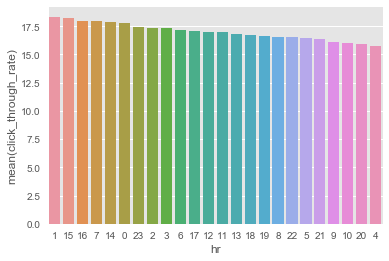

In [133]:
import seaborn as sns
sns.barplot(y='click_through_rate',x='hr'\
            ,data=hour_df\
            ,order=list_of_hours)

# Weekday ~ day_name

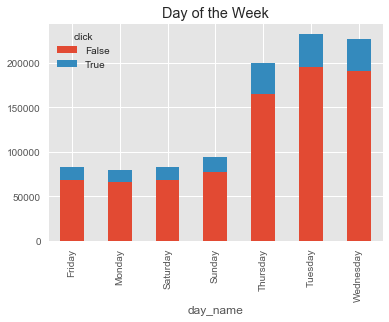

In [135]:
train_data.groupby(['day_name','click']).size().unstack().plot(kind='bar', stacked=True, title="Day of the Week")

# weekday ~ day_name (for clicks)

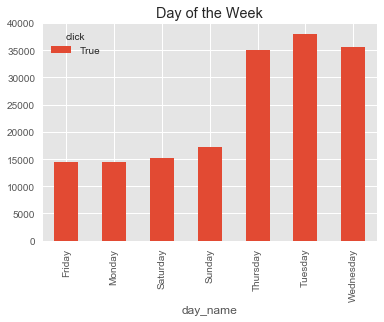

In [136]:
train_data_clicks.groupby(['day_name','click']).size().unstack().plot(kind='bar', stacked=True, title="Day of the Week")

In [138]:
train_data_clicks[['day_name','click']].groupby(['day_name']).count().sort_values('click',ascending=False)

,click
day_name,
Tuesday,38050
Wednesday,35635
Thursday,35051
Sunday,17250
Saturday,15107
Monday,14489
Friday,14366


### Most clicks on Tuesday, then wednesday followed by Thursday

# Day wise analysis of click through rates 

In [140]:
day_df = pd.DataFrame()

In [141]:
day_df['day'] = train_data_clicks[['day_name','click']].groupby(['day_name']).count().reset_index().sort_values('click',ascending=False)['day_name']
day_df           

,day
5,Tuesday
6,Wednesday
4,Thursday
3,Sunday
2,Saturday
1,Monday
0,Friday


### Day-wise clicks

In [142]:
day_df['pos_clicks'] = train_data_clicks[['day_name','click']]\
                        .groupby(['day_name']).count()\
                        .reset_index()\
                        .sort_values('click',ascending=False)['click']
day_df

,day,pos_clicks
5,Tuesday,38050
6,Wednesday,35635
4,Thursday,35051
3,Sunday,17250
2,Saturday,15107
1,Monday,14489
0,Friday,14366


### Day-wise Impressions

In [146]:
day_df['total_impressions'] = train_data[['day_name','click']].groupby(['day_name']).count().reset_index().sort_values('click',ascending=False)['click']
day_df

,day,pos_clicks,total_impressions,click_pct
5,Tuesday,38050,232962,100.0
6,Wednesday,35635,227003,100.0
4,Thursday,35051,199970,100.0
3,Sunday,17250,94459,100.0
2,Saturday,15107,83079,100.0
1,Monday,14489,79938,100.0
0,Friday,14366,82590,100.0


### Day-wise Click Percentages 

In [148]:
day_df['click_pct'] = 100*day_df['pos_clicks']/day_df['total_impressions']
day_df.sort_values(ascending = False, by = 'click_pct')

,day,pos_clicks,total_impressions,click_pct
3,Sunday,17250,94459,18.261891
2,Saturday,15107,83079,18.183897
1,Monday,14489,79938,18.125297
4,Thursday,35051,199970,17.528129
0,Friday,14366,82590,17.394358
5,Tuesday,38050,232962,16.333136
6,Wednesday,35635,227003,15.698030


### Sunday has the highest value of click through rate 

In [150]:
list_of_days = day_df.sort_values(by='click_pct',ascending=False)['day'].tolist()

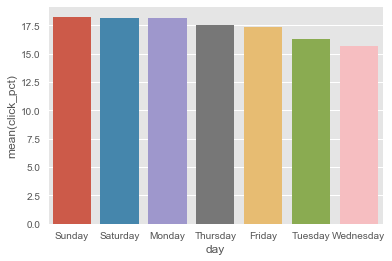

In [151]:
sns.barplot(y='click_pct',x='day'\
            ,data=day_df\
            ,order=list_of_days)

# Banner Position

### Banner positions representing attractive and appealing designs that might highly affect a user's behavior and in turn trigger their decision to click. Or not. Hence making it an effective metric to predict clicks

In [310]:
train_data['banner_pos'].unique()

array([0, 1, 5, 2, 4, 7, 3], dtype=uint64)

#### It's unclear as to what the 7 banner positions (represented as integers) represent. Intuitively and based on research, the 7 positions might represent ad placing in a 2D webpage  

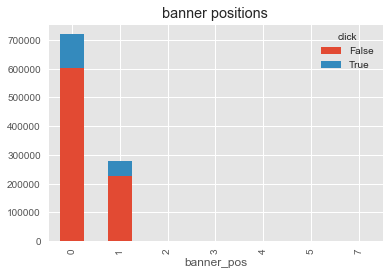

In [152]:
banner_temp =train_data[['banner_pos','click']].groupby(['banner_pos','click'])

banner_temp.size().unstack().plot(kind='bar',stacked=True, title='banner positions')

#### Positions 0 and 1 ~ the most prominent banner positions garnering most impressions 

In [153]:
train_data[['banner_pos','click']].groupby(['banner_pos']).count().sort_values('click',ascending=False)

,click
banner_pos,
0,720202
1,277965
7,1086
2,338
4,197
5,160
3,53


### BANNER POSITIONS 0 and 1 generating most impressions and clicks

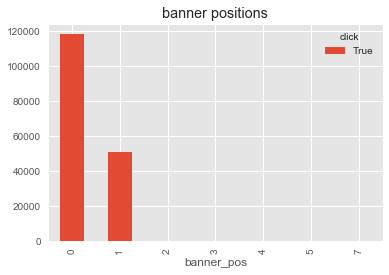

In [154]:
banner_temp =train_data_clicks[['banner_pos','click']].groupby(['banner_pos','click'])

banner_temp.size().unstack().plot(kind='bar',stacked=True, title='banner positions')

In [155]:
train_data_clicks[['banner_pos','click']].groupby(['banner_pos']).count().sort_values('click',ascending=False)

,click
banner_pos,
0,118482
1,50998
7,358
2,44
4,39
5,18
3,9


## CTR analysis on Banner position 


In [157]:
import pandas as pd 

banner_df = pd.DataFrame()

In [158]:
banner_df['position'] = train_data_clicks[['banner_pos','click']].groupby(['banner_pos']).count().reset_index().sort_values('click',ascending=False)['banner_pos']

In [159]:
banner_df['pos_clicks'] = train_data_clicks[['banner_pos','click']].groupby(['banner_pos']).count().reset_index().sort_values('click',ascending=False)['click']

In [160]:
banner_df['total_impressions'] = train_data[['banner_pos','click']].groupby(['banner_pos']).count().reset_index().sort_values('click',ascending=False)['click']

In [162]:
banner_df['click_pct'] = 100*banner_df['pos_clicks']/banner_df['total_impressions']

banner_df

,position,pos_clicks,total_impressions,click_pct
0,0,118482,720202,16.451218
1,1,50998,277965,18.346914
6,7,358,1086,32.965009
2,2,44,338,13.017751
4,4,39,197,19.796954
5,5,18,160,11.250000
3,3,9,53,16.981132


In [163]:
banner_df.sort_values(ascending=False,by='click_pct')

,position,pos_clicks,total_impressions,click_pct
6,7,358,1086,32.965009
4,4,39,197,19.796954
1,1,50998,277965,18.346914
3,3,9,53,16.981132
0,0,118482,720202,16.451218
2,2,44,338,13.017751
5,5,18,160,11.250000


#### Banner 7 has the highest click through rate 

In [164]:
list_of_banners = banner_df.sort_values(by='click_pct',ascending=False)['position'].tolist()

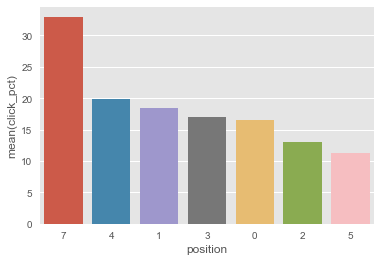

In [165]:
sns.barplot(y='click_pct',x='position'\
            ,data=banner_df\
            ,order=list_of_banners)

#### Banner position 7 seems to be a nice choice for placing advertisements. As per click through rate. 

# DEVICE TYPE Metrics

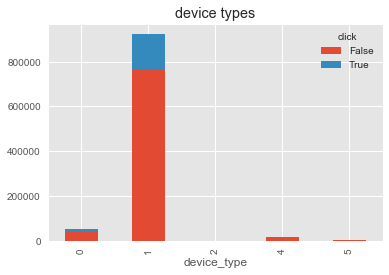

In [166]:
device_temp = train_data[['device_type','click']].groupby(['device_type','click'])

device_temp.size().unstack().plot(kind='bar',stacked=True, title='device types')


### Device type 1 getting most impressions among the 5 devices

In [167]:
train_data[['device_type','click']].groupby(['device_type']).count().sort_values('click',ascending=False)

,click
device_type,
1,922389
0,55135
4,19214
5,3262
2,1


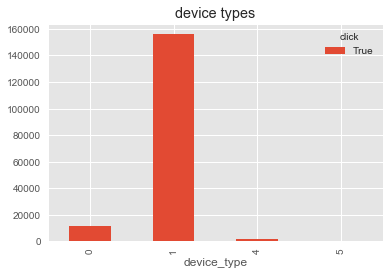

In [168]:
train_data_clicks[['device_type','click']].groupby(['device_type','click']).size().unstack().plot(kind='bar',stacked=True, title='device types')

In [169]:
train_data_clicks[['device_type','click']].groupby(['device_type']).count().sort_values('click',ascending=False)

,click
device_type,
1,156143
0,11707
4,1777
5,321


### Device Type 1 gets the maximum number of clicks too

In [201]:
device1_df = train_data_clicks[train_data_clicks['device_type']==1]

# extract CLICKS for DEVICE TYPE 1 

### Hourly distribution of clicks on Device 1

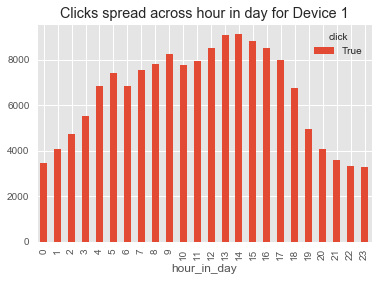

In [204]:
temp_device_df = device1_df.groupby(['hour_in_day', 'click'])

temp_device_df.size().unstack().plot(kind='bar', stacked=True, title="Clicks spread across hour in day for Device 1")

#### Device type 1 --- probably cell phone// Desktop Reasons --- Businesses might not prefer showing ads later in the evening----- after work hours// business hours ( Click spread max between 9 to 5 ) 



## Click through rate analysis w.r.t Device type(merging data frames)


### Had to merge data frames to ensure consistency

In [179]:
import pandas as pd
dev_type_df=pd.DataFrame()

dev_type_df_total_imp = pd.DataFrame()

In [184]:
#TOTAL CLICKS 

dev_type_df = train_data_clicks.groupby('device_type').agg({'click':'sum'}).reset_index()

dev_type_df

,device_type,click
0,0,11707.0
1,1,156143.0
2,4,1777.0
3,5,321.0


In [185]:
#TOTAL IMPRESSIONS 

dev_type_df_total_imp = train_data.groupby('device_type').agg({'click':'count'}).reset_index()

,device_type,click
0,0,55135
1,1,922389
2,2,1
3,4,19214
4,5,3262


In [183]:
#dev_type_df_total_imp.drop([2], inplace = True)

dev_type_df_total_imp

,device_type,click
0,0,55135
1,1,922389
3,4,19214
4,5,3262


In [187]:
dev_type_df['total_impressions'] = dev_type_df_total_imp['click']

dev_type_df

,device_type,click,total_impressions
0,0,11707.0,55135
1,1,156143.0,922389
2,4,1777.0,1
3,5,321.0,19214


In [189]:
## sucess percentage == CTR 

dev_type_df['success_pct'] = (dev_type_df['click']/dev_type_df['total_impressions'])*100

dev_type_df

,device_type,click,total_impressions,success_pct
0,0,11707.0,55135,21.233336
1,1,156143.0,922389,16.928107
2,4,1777.0,1,177700.000000
3,5,321.0,19214,1.670657


In [191]:
dev_type_df_total_imp.columns = ['device_type', 'click2']

merged_df = pd.merge(left = dev_type_df , right = dev_type_df_total_imp,
                    how = 'inner', on = 'device_type')



In [192]:
merged_df

,device_type,click,total_impressions,success_pct,click2
0,0,11707.0,55135,21.233336,55135
1,1,156143.0,922389,16.928107,922389
2,4,1777.0,1,177700.000000,19214
3,5,321.0,19214,1.670657,3262


#del merged_df['total_impressions']

merged_df.columns = ['device_type', 'click','success_pct',
                    'total_impressions']
merged_df

In [200]:
merged_df['success_pct'] = 100*(merged_df['click']/merged_df['total_impressions'])

merged_df

,device_type,click,success_pct,total_impressions
0,0,11707.0,21.233336,55135
1,1,156143.0,16.928107,922389
2,4,1777.0,9.248465,19214
3,5,321.0,9.840589,3262


### Device Type 0 with the highest click through rate

## App Related Metrics

#### App_Id, App_Domain, App_Category

In [206]:
app_features = ['app_id', 'app_domain', 'app_category']

In [207]:
train_data.groupby('app_category').agg({'click':'sum'}).sort_values(by='click',ascending = False)


,click
app_category,
07d7df22,129085.0
0f2161f8,25441.0
f95efa07,6987.0
cef3e649,4018.0
8ded1f7a,3326.0
d1327cf5,351.0
09481d60,224.0
dc97ec06,198.0
75d80bbe,101.0


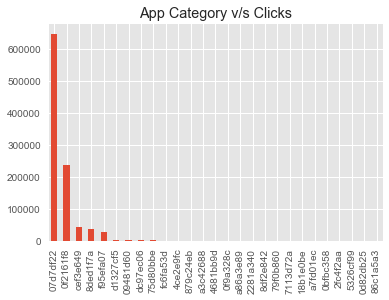

In [208]:
train_data['app_category'].value_counts().plot(kind='bar', title='App Category v/s Clicks')


### Studying Clicks behavior across different app categories

In [211]:
train_app_category = train_data.groupby(['app_category', 'click']).size().unstack()


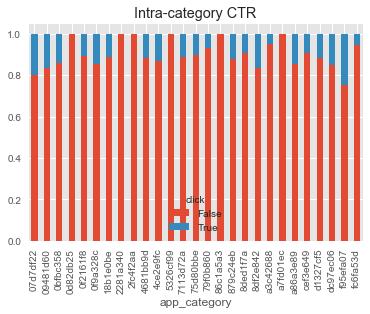

In [212]:

train_app_category.div(train_app_category.sum(axis=1), axis=0).plot(kind='bar', stacked=True, title="Intra-category CTR")

## C1, C14-C21 features

In [213]:

features = ['C1', 'C14', 'C15', 'C16', 'C17', 'C18',
            'C20', 'C21']

train_data[features].astype('object').describe()



,C1,C14,C15,C16,C17,C18,C20,C21
count,1000001,1000001,1000001,1000001,1000001,1000001,1000001,1000001
unique,7,2251,8,9,420,4,163,60
top,1005,4687,320,50,1722,0,65535,23
freq,918405,23298,932737,943504,111786,419161,467791,220235


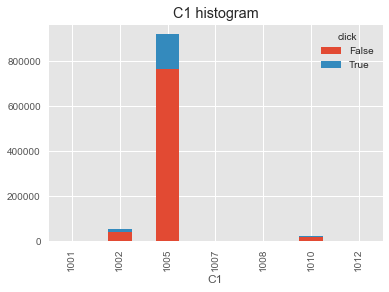

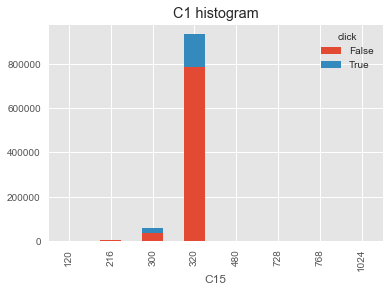

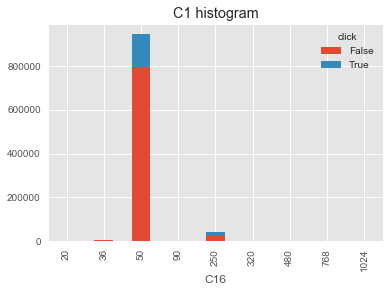

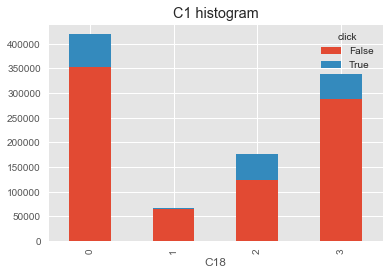

In [214]:
train_data.groupby(['C1', 'click']).size().unstack().plot(kind='bar', stacked=True, title='C1 histogram')
train_data.groupby(['C15', 'click']).size().unstack().plot(kind='bar', stacked=True, title='C1 histogram')
train_data.groupby(['C16', 'click']).size().unstack().plot(kind='bar', stacked=True, title='C1 histogram')
train_data.groupby(['C18', 'click']).size().unstack().plot(kind='bar', stacked=True, title='C1 histogram')


# Part 2: Developing the Prediction model

### Using the key metrics discussed above as a part of the EDA to put together a predictive model in order to forecast the possibility of a click

### Data preparation stage ~~ To be fed in the data pipeline 

In [314]:
model_features = ['weekday', 'hour_in_day',
                  'banner_pos', 'site_category',
                  'device_conn_type', 'app_category',
                  'device_type']

In [315]:
model_target = 'click'

In [ ]:
train_model = train_data[model_features+[model_target]].sample(frac=0.1,random_state=42)

#### Clubbing the model features with the target and selecting a fraction in order to speeden up computation

In [278]:
def one_hot_features(data_frame, feature_set):
    new_data_frame = pd.get_dummies(data_frame,
                                     columns = feature_set,
                                    sparse = True)

    return new_data_frame

#### Features Site_category and App_category are hashed and need to be represented in a readable format

#### Banner_pos is represented as integers hence we make use of one hot encoding to deal with all these features

In [ ]:
train_model = one_hot_features(train_model,
                                ['site_category',
                                 'app_category',
                                 'banner_pos'])


In [226]:
train_data.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,C15,C16,C17,C18,C19,C20,C21,hour_in_day,weekday,day_name
0,10010966574628106108,True,2014-10-21,1005,0,85f751fd,c4e18dd6,50e219e0,0acbeaa3,45a51db4,...,320,50,2161,0,35,34498,157,0,1,Tuesday
1,10018563981679953217,False,2014-10-21,1005,0,85f751fd,c4e18dd6,50e219e0,8bfb92e0,7801e8d9,...,320,50,1996,1,41,34521,71,0,1,Tuesday
2,10030228488972929850,False,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,320,50,1722,0,35,34548,79,0,1,Tuesday
3,10031998322520623865,False,2014-10-21,1005,0,6c5b482c,7687a86e,3e814130,ecad2386,7801e8d9,...,300,250,1994,2,39,34547,33,0,1,Tuesday
4,10032235721168274495,False,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,320,50,1722,0,35,34548,79,0,1,Tuesday


### Extracting all columns from the train model except the target mask column 

In [281]:
model_features = np.array(train_model.columns[train_model.columns!=model_target].tolist())

In [282]:
from sklearn.model_selection import train_test_split

In [283]:
#from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    train_model[model_features].values,
    train_model[model_target].values,
    test_size=0.3,
    random_state=42
)


### Feature Selection ~ To reduce the dimensional space occupied and to deal with overfitting, use GRID SEARCH cross validation and regularization to obtain trade off b/w number of features and F-1 score

In [284]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import f1_score


### F1 score used as a performance metric because it represents the harmonic mean between precision and recall 

In [285]:
num_splits = 3
c_values = np.logspace(-3,0,7)


In [286]:
stratified_k_fold = StratifiedKFold(n_splits=num_splits)

scores = np.zeros(7)
nr_params = np.zeros(7)


### Model: logistic Regression with L1 regularization and balanced class weights

In [ ]:
for train_data, valid_data in stratified_k_fold.split(x_train,
                                                      y_train):
    for i, c in enumerate(np.logspace(-3, 0, 7)):
        lr_classify = LogisticRegression(penalty='l1',
                                         class_weight='balanced',
                                         C = c)
        lr_classify.fit(x_train[train_data],
                        y_train[train_data])

        #validation_Set evaluation

        y_prediction = lr_classify.predict(x_train[valid_data])
        score_f1 = f1_score(y_train[valid_data],
                            y_prediction, average='weighted' )

        scores[i] += score_f1 / num_splits

        ### spot the selected parameters ##

        model_selected = SelectFromModel(lr_classify, prefit=True)
        nr_params[i] += np.sum(model_selected.get_support()) / num_splits



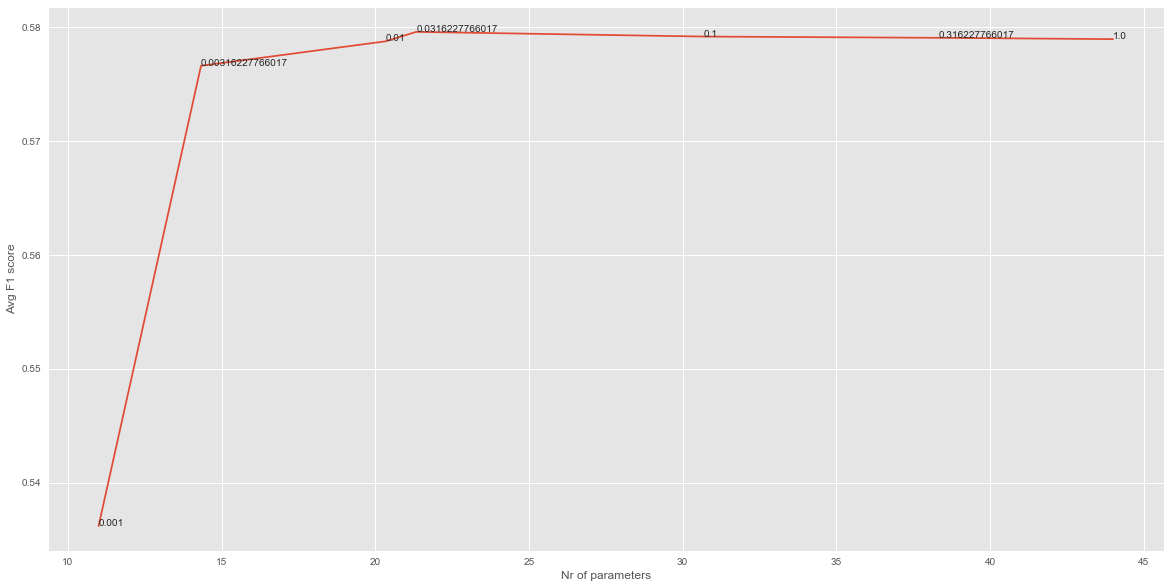

In [254]:
plt.figure(figsize=(20, 10))
plt.plot(nr_params, scores)

for i, c in enumerate(c_values):
    plt.annotate(c, (nr_params[i], scores[i]))
plt.xlabel("Nr of parameters")
plt.ylabel("Avg F1 score")


### Parameters obtained using c = 0.1 manage to reduce parameters dimension which optimizes the execution time also improving generalization capacity. 


In [288]:
lr_classify = LogisticRegression(C=0.1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


In [289]:
lr_classify.fit(x_train, y_train)


LogisticRegression(C=0.1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [290]:
model_selected = SelectFromModel(lr_classify,
                                 prefit=True )

In [292]:
#pruned_params = model_selected.get_support()
pruned_params

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
       False,  True, False, False,  True, False, False,  True,  True,
       False, False, False, False,  True, False,  True, False,  True,
        True,  True,  True, False, False,  True, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
        True, False,  True, False, False,  True,  True, False,  True,
        True,  True, False,  True, False, False,  True,  True], dtype=bool)

In [293]:
model_features = model_features[pruned_params]

x_train = x_train[:, pruned_params]

x_test = x_test[:, pruned_params]


## Model : Gradient Boosting

### Part 3: Evaluating results using various performance metrics

In [294]:
import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import classification_report


In [295]:
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train,
    y_train,
    stratify=y_train,
    test_size=0.1,
    random_state=42)

In [318]:
model = XGBClassifier()
xgb_clf = model

### Log Loss values measuring the performances of a classification models where the prediction label is a value between 0 and 1. The goal of the model is to minmize this value

In [297]:
xgb_clf.fit(x_train, y_train, early_stopping_rounds=10,
            eval_metric="logloss", eval_set=[(x_valid, y_valid)])

[0]	validation_0-logloss:0.650231
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.61528
[2]	validation_0-logloss:0.586556
[3]	validation_0-logloss:0.56279
[4]	validation_0-logloss:0.543031
[5]	validation_0-logloss:0.526546
[6]	validation_0-logloss:0.512758
[7]	validation_0-logloss:0.501204
[8]	validation_0-logloss:0.491522
[9]	validation_0-logloss:0.483386
[10]	validation_0-logloss:0.476531
[11]	validation_0-logloss:0.470792
[12]	validation_0-logloss:0.465976
[13]	validation_0-logloss:0.461713
[14]	validation_0-logloss:0.458291
[15]	validation_0-logloss:0.455468
[16]	validation_0-logloss:0.453099
[17]	validation_0-logloss:0.451071
[18]	validation_0-logloss:0.449424
[19]	validation_0-logloss:0.448046
[20]	validation_0-logloss:0.446888
[21]	validation_0-logloss:0.445896
[22]	validation_0-logloss:0.445083
[23]	validation_0-logloss:0.444377
[24]	validation_0-logloss:0.443787
[25]	validation_0-logloss:0.443308
[26]	validation_0-logloss:0.44288


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [298]:
y_pred = xgb_clf.predict(x_test)
predictions = [round(value) for value in y_pred]

In [301]:
print(classification_report(y_test,
                            predictions))

             precision    recall  f1-score   support

      False       0.83      1.00      0.91    248673
       True       0.68      0.00      0.00     51328

avg / total       0.80      0.83      0.75    300001



### Other evaluation metrics: Accuracy score, Confusion Matrix, ROC/AUC score

In [320]:
from sklearn import metrics

print(metrics.accuracy_score(y_test, predictions))
print(metrics.confusion_matrix(y_test, predictions))
print(metrics.roc_auc_score(y_test, predictions))


0.829060569798
[[248633     40]
 [ 51242     86]]
0.500757322471


### The model has an 83% accuracy score and 0.5 is the area under the receiver operating characteristic curve. ROCAUC implying the expected position of positives drawn  before a uniformly drawn random negative

## Saving the XGBoost and Logistic models

In [319]:
import pickle
filename = 'xgb_mod.sav'
filename2 = 'logistic.sav'
pickle.dump(xgb_clf,open(filename, 'wb' ))
pickle.dump(lr_classify, open(filename2, 'wb'))


## ############ End of AppOnBoard Technical modeling assignment ###############